In [5]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as asc
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
train_path = 'FER2013-Data_Extracted_7_emo/train'
valid_path = 'FER2013-Data_Extracted_7_emo/valid'
test_path = 'FER2013-Data_Extracted_7_emo/test'

In [7]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(48,48), color_mode = 'grayscale', batch_size=70)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(48,48), color_mode = 'grayscale', batch_size=50)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(48,48), color_mode = 'grayscale', batch_size=50, shuffle=False)

Found 28700 images belonging to 7 classes.
Found 3500 images belonging to 7 classes.
Found 3500 images belonging to 7 classes.


In [8]:
test_batches.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6}

(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)

## Conv Net

In [9]:
model = Sequential()

input_shape = (48,48,1)
model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(7))
model.add(Activation('softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)      

^^Note the number of trainable parameters

## Compile and Train

In [11]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
%%time
H = model.fit_generator(generator=train_batches, steps_per_epoch=410, 
    validation_data=valid_batches, validation_steps=70, epochs=30, verbose=2)


Epoch 1/30
 - 270s - loss: 1.7378 - accuracy: 0.3513 - val_loss: 1.6737 - val_accuracy: 0.2551
Epoch 2/30
 - 261s - loss: 1.4021 - accuracy: 0.4690 - val_loss: 1.3914 - val_accuracy: 0.4674
Epoch 3/30
 - 260s - loss: 1.2045 - accuracy: 0.5496 - val_loss: 1.1257 - val_accuracy: 0.4866
Epoch 4/30
 - 260s - loss: 1.0452 - accuracy: 0.6134 - val_loss: 1.3888 - val_accuracy: 0.5214
Epoch 5/30
 - 260s - loss: 0.8776 - accuracy: 0.6860 - val_loss: 1.4448 - val_accuracy: 0.5411
Epoch 6/30
 - 261s - loss: 0.6943 - accuracy: 0.7626 - val_loss: 1.4153 - val_accuracy: 0.5554
Epoch 7/30
 - 263s - loss: 0.5120 - accuracy: 0.8402 - val_loss: 0.9564 - val_accuracy: 0.5594
Epoch 8/30
 - 265s - loss: 0.3399 - accuracy: 0.9099 - val_loss: 1.7407 - val_accuracy: 0.5426
Epoch 9/30
 - 268s - loss: 0.2159 - accuracy: 0.9540 - val_loss: 1.1303 - val_accuracy: 0.5654
Epoch 10/30
 - 270s - loss: 0.1398 - accuracy: 0.9752 - val_loss: 1.8262 - val_accuracy: 0.5566
Epoch 11/30
 - 278s - loss: 0.0979 - accuracy: 0

## Plot Graph

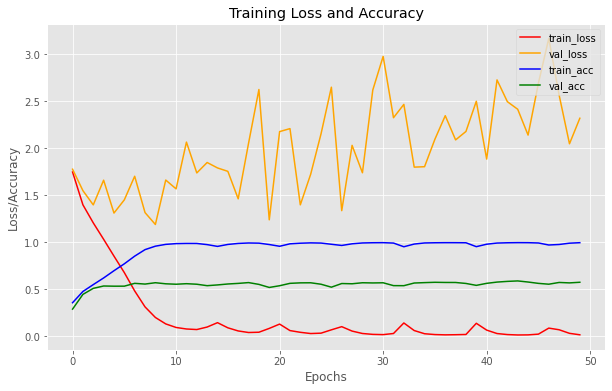

In [14]:
epochs = 50

plt.style.use("ggplot")
plt.figure(figsize=(10,6))
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss", color='r')
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss", color='orange')
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc", color='b')
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc", color='green')
plt.title("Training Loss and Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

plt.savefig("plot.png")

## Testing

In [15]:
test_labels = test_batches.classes

In [16]:
test_labels

array([0, 0, 0, ..., 6, 6, 6])

In [17]:
predictions = model.predict_generator(generator=test_batches, steps=70, verbose=0)

In [18]:
predictions.argmax(axis=1)

array([6, 0, 0, ..., 3, 6, 6], dtype=int64)

In [15]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
print(f"Confusion Matrix:\n{cm}")
accuracy = asc(y_true=test_labels, y_pred=predictions.argmax(axis=1))
print(f"\nAccuracy:{accuracy}")

Confusion Matrix:
[[239   5  55  35  88  17  52]
 [  7  30   7   2   6   1   2]
 [ 71   3 236  26  83  51  58]
 [ 38   0  29 630  38  13  42]
 [ 67   1  90  63 244  14 115]
 [ 10   0  39  27  19 301  20]
 [ 59   1  52  58  97  10 349]]

Accuracy:0.5797142857142857


## Saving Model

In [19]:
fer_json = model.to_json()
with open("fer.json","w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer_wts.h5")

## Load and Predict

In [19]:
from keras.models import model_from_json

In [20]:
model = model_from_json(open("fer.json", "r").read())

In [21]:
model.load_weights("fer_wts.h5")

In [24]:
from PIL import Image
from skimage import transform
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')
    np_image = transform.resize(np_image, (48, 48, 1))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load('test3.jpg')
x = model.predict(image)
x

array([[8.8984927e-04, 7.9114789e-06, 4.1089043e-02, 1.7840829e-02,
        9.0079165e-01, 3.9214700e-02, 1.6605313e-04]], dtype=float32)